<a href="https://colab.research.google.com/github/Ayman-Abdeen/Data-Science/blob/main/udemy-project%20/udemy-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Udemy EDA

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

loading Data

In [4]:
rawdf = pd.read_csv('/content/udemy_courses-raw.csv')

In [5]:
rawdf.head(3)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance

In [6]:
rawdf.sample(3)

course_id                                       course_title  \
2089     789820  Instant Harmonica - play Christmas + Birthday ...   
2108     839028      Bluegrass Guitar Essentials: Webisodes 9 & 10   
3631     935014  Simplified Cross Browser Web Testing Using Vir...   

                                                    url  is_paid  price  \
2089  https://www.udemy.com/instant-harmonica-play-c...     True     40   
2108  https://www.udemy.com/bluegrass-guitar-essenti...     True     30   
3631  https://www.udemy.com/cross-browser-web-testin...     True     20   

      num_subscribers  num_reviews  num_lectures               level  \
2089              236            0            18          All Levels   
2108               10            0            12  Intermediate Level   
3631              796            3            18      Beginner Level   

      content_duration   published_timestamp              subject  
2089               1.5  2016-05-18T18:46:00Z  Musical Instruments  
2108               2.0  2016-08-06T15:31:24Z  Musical Instruments  
3631               1.0  2016-09-13T00:45:39Z      Web Development

In [7]:
rawdf.shape

(3678, 12)

In [8]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [9]:
rawdf.describe().round(2)

course_id    price  num_subscribers  num_reviews  num_lectures  \
count     3678.00  3678.00          3678.00      3678.00       3678.00   
mean    675971.96    66.05          3197.15       156.26         40.11   
std     343273.16    61.01          9504.12       935.45         50.38   
min       8324.00     0.00             0.00         0.00          0.00   
25%     407692.50    20.00           111.00         4.00         15.00   
50%     687917.00    45.00           911.50        18.00         25.00   
75%     961355.50    95.00          2546.00        67.00         45.75   
max    1282064.00   200.00        268923.00     27445.00        779.00   

       content_duration  
count           3678.00  
mean               4.09  
std                6.05  
min                0.00  
25%                1.00  
50%                2.00  
75%                4.50  
max               78.50

Data Pre-processing

In [10]:
rawdf.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [15]:
rawdf['published_timestamp'] = pd.to_datetime(rawdf['published_timestamp'])

In [16]:
rawdf.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [11]:
rawdf['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [12]:
rawdf['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [13]:
rawdf['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

In [18]:
rawdf['year'] = rawdf['published_timestamp'].dt.year

In [19]:
rawdf['month'] = rawdf['published_timestamp'].dt.month_name()

In [20]:
rawdf['Day'] = rawdf['published_timestamp'].dt.day_name()

In [21]:
rawdf['quarter'] = rawdf['published_timestamp'].dt.quarter

In [22]:
rawdf.set_index('published_timestamp', inplace=True)

In [23]:
rawdf['price'].value_counts()

price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64

In [24]:
rawdf['Profit'] = rawdf['price'] * rawdf['num_subscribers']

In [25]:
rawdf.shape

(3678, 16)

In [26]:
rawdf['course_id'].nunique()

3672

In [27]:
rawdf.duplicated().sum()

6

In [28]:
rawdf[rawdf.duplicated()]

course_id  \
published_timestamp                    
2016-05-16 18:28:30+00:00     837322   
2017-04-23 16:19:01+00:00    1157298   
2016-12-15 14:56:17+00:00    1035638   
2017-07-02 14:29:35+00:00    1084454   
2014-04-15 21:48:55+00:00     185526   
2013-01-03 00:55:31+00:00      28295   

                                                                course_title  \
published_timestamp                                                            
2016-05-16 18:28:30+00:00  Essentials of money value: Get a financial Life !   
2017-04-23 16:19:01+00:00  Introduction to Forex Trading Business For Beg...   
2016-12-15 14:56:17+00:00                 Understanding Financial Statements   
2017-07-02 14:29:35+00:00                  CFA Level 2- Quantitative Methods   
2014-04-15 21:48:55+00:00                             MicroStation - Células   
2013-01-03 00:55:31+00:00  Learn Web Designing & HTML5/CSS3 Essentials in...   

                                                                         url  \
published_timestamp                                                            
2016-05-16 18:28:30+00:00   https://www.udemy.com/essentials-of-money-value/   
2017-04-23 16:19:01+00:00  https://www.udemy.com/introduction-to-forex-tr...   
2016-12-15 14:56:17+00:00  https://www.udemy.com/understanding-financial-...   
2017-07-02 14:29:35+00:00  https://www.udemy.com/cfa-level-2-quantitative...   
2014-04-15 21:48:55+00:00        https://www.udemy.com/microstation-celulas/   
2013-01-03 00:55:31+00:00  https://www.udemy.com/build-beautiful-html5-we...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2016-05-16 18:28:30+00:00     True     20                0            0   
2017-04-23 16:19:01+00:00     True     20                0            0   
2016-12-15 14:56:17+00:00     True     25                0            0   
2017-07-02 14:29:35+00:00     True     40                0            0   
2014-04-15 21:48:55+00:00     True     20                0            0   
2013-01-03 00:55:31+00:00     True     75            43285          525   

                           num_lectures           level  content_duration  \
published_timestamp                                                         
2016-05-16 18:28:30+00:00            20      All Levels          0.616667   
2017-04-23 16:19:01+00:00            27  Beginner Level          1.500000   
2016-12-15 14:56:17+00:00            10      All Levels          1.000000   
2017-07-02 14:29:35+00:00            35      All Levels          5.500000   
2014-04-15 21:48:55+00:00             9  Beginner Level          0.616667   
2013-01-03 00:55:31+00:00            24      All Levels          4.000000   

                                    subject     month  year       Day  \
published_timestamp                                                     
2016-05-16 18:28:30+00:00  Business Finance       May  2016    Monday   
2017-04-23 16:19:01+00:00  Business Finance     April  2017    Sunday   
2016-12-15 14:56:17+00:00  Business Finance  December  2016  Thursday   
2017-07-02 14:29:35+00:00  Business Finance      July  2017    Sunday   
2014-04-15 21:48:55+00:00    Graphic Design     April  2014   Tuesday   
2013-01-03 00:55:31+00:00   Web Development   January  2013  Thursday   

                           quarter   Profit  
published_timestamp                          
2016-05-16 18:28:30+00:00        2        0  
2017-04-23 16:19:01+00:00        2        0  
2016-12-15 14:56:17+00:00        4        0  
2017-07-02 14:29:35+00:00        3        0  
2014-04-15 21:48:55+00:00        2        0  
2013-01-03 00:55:31+00:00        1  3246375

In [29]:
rawdf.drop_duplicates(inplace=True)

In [30]:
rawdf['content_duration'].value_counts()

content_duration
1.000000     606
1.500000     506
2.000000     419
2.500000     269
3.000000     248
            ... 
0.483333       1
78.500000      1
70.000000      1
0.000000       1
66.500000      1
Name: count, Length: 105, dtype: int64

In [31]:
rawdf['content_duration'].sort_values()

published_timestamp
2015-12-17 05:38:38+00:00     0.000000
2017-05-01 18:50:43+00:00     0.133333
2016-10-10 21:05:19+00:00     0.316667
2015-03-27 17:16:21+00:00     0.450000
2015-12-07 18:36:33+00:00     0.466667
                               ...    
2013-10-16 11:37:30+00:00    68.500000
2014-03-07 15:13:45+00:00    70.000000
2014-12-22 16:57:30+00:00    71.500000
2015-11-09 22:01:02+00:00    76.500000
2016-10-11 21:40:06+00:00    78.500000
Name: content_duration, Length: 3672, dtype: float64

In [32]:
rawdf['duration'] = pd.qcut(rawdf['content_duration'] , 6 , ['0:1','1:3','3:7','7:12','12:20','20+'] )

In [33]:
rawdf.rename(columns={'duration':'duration_category'}, inplace=True)

In [34]:
rawdf['duration_category'].value_counts()

duration_category
0:1      931
7:12     699
20+      590
12:20    527
1:3      506
3:7      419
Name: count, dtype: int64

In [35]:
rawdf['price'].value_counts()

price
20     827
50     468
0      310
200    295
40     216
30     166
25     153
95     152
100    133
195    127
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64

In [36]:
price_dict = {
    0: 'Free',
    range(20,55,5): '20-55',
    range(55,105,5): '55-100',
    range(105,155,5): '105-150',
    range(155,205,5): '155-200',
}


In [37]:
rawdf['price_category'] = rawdf['price'].replace(price_dict)

#Exploratort Data Analysis (EDA)

- Univariate Analysis
- Bi-variate Analysis
- Multi-variate Analysis

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install ydata-profiling

In [41]:
#from pandas_profiling import ProfileReport

In [42]:
from ydata_profiling import ProfileReport
profile_report = ProfileReport(rawdf)

In [43]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
# saving to html format
profile_report.to_file("output.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
rawdf.sample(3)

course_id  \
published_timestamp                    
2015-11-10 22:15:21+00:00     661878   
2014-10-02 17:40:19+00:00     311846   
2016-05-27 17:16:58+00:00     754524   

                                                                course_title  \
published_timestamp                                                            
2015-11-10 22:15:21+00:00    Learn to Build Web Apps using Laravel Framework   
2014-10-02 17:40:19+00:00  How to Create Vector Characters in Illustrator...   
2016-05-27 17:16:58+00:00  Fundraising Success: The Art & Science of Majo...   

                                                                         url  \
published_timestamp                                                            
2015-11-10 22:15:21+00:00  https://www.udemy.com/learn-to-build-web-apps-...   
2014-10-02 17:40:19+00:00  https://www.udemy.com/how-to-create-vector-cha...   
2016-05-27 17:16:58+00:00  https://www.udemy.com/fundraising-success-the-...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2015-11-10 22:15:21+00:00     True     30              746           93   
2014-10-02 17:40:19+00:00     True     25               92            3   
2016-05-27 17:16:58+00:00     True     50               38            9   

                           num_lectures               level  content_duration  \
published_timestamp                                                             
2015-11-10 22:15:21+00:00            39          All Levels               6.5   
2014-10-02 17:40:19+00:00            15      Beginner Level               3.5   
2016-05-27 17:16:58+00:00            25  Intermediate Level               2.5   

                                    subject     month  year       Day  \
published_timestamp                                                     
2015-11-10 22:15:21+00:00   Web Development  November  2015   Tuesday   
2014-10-02 17:40:19+00:00    Graphic Design   October  2014  Thursday   
2016-05-27 17:16:58+00:00  Business Finance       May  2016    Friday   

                           quarter  Profit duration_category price_category  
published_timestamp                                                          
2015-11-10 22:15:21+00:00        4   22380               20+          20-55  
2014-10-02 17:40:19+00:00        4    2300              7:12          20-55  
2016-05-27 17:16:58+00:00        2    1900              7:12          20-55

#Subject
###1] uni-variate Analysis

In [46]:
rawdf['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

<Axes: xlabel='subject'>

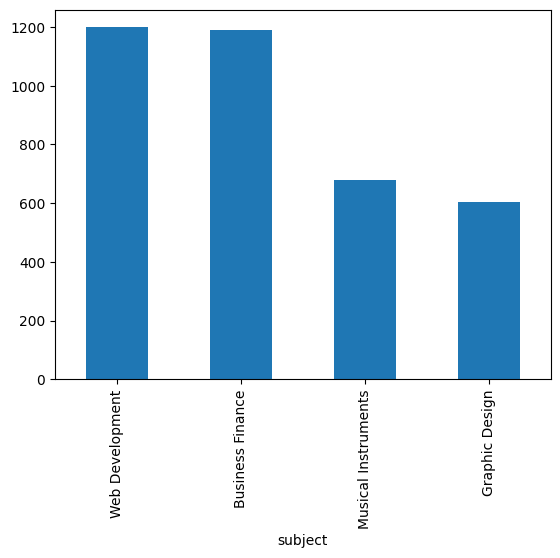

In [47]:
rawdf['subject'].value_counts().plot(kind='bar')

###2] Bi-variate Analysis

How many subscribers in each subject?

In [48]:
rawdf.sample(2)

course_id  \
published_timestamp                    
2017-04-28 16:54:20+00:00    1163894   
2016-06-15 22:08:40+00:00     862428   

                                                                course_title  \
published_timestamp                                                            
2017-04-28 16:54:20+00:00  Build a Chatbot integrated Website using Boots...   
2016-06-15 22:08:40+00:00  PHP : Learn to upload files to Amazon S3 and u...   

                                                                         url  \
published_timestamp                                                            
2017-04-28 16:54:20+00:00  https://www.udemy.com/build-a-chatbot-integrat...   
2016-06-15 22:08:40+00:00  https://www.udemy.com/php-learn-to-upload-file...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2017-04-28 16:54:20+00:00     True     50              165           13   
2016-06-15 22:08:40+00:00     True     50             1216           36   

                           num_lectures       level  content_duration  \
published_timestamp                                                     
2017-04-28 16:54:20+00:00            28  All Levels               3.0   
2016-06-15 22:08:40+00:00            28  All Levels               3.0   

                                   subject  month  year        Day  quarter  \
published_timestamp                                                           
2017-04-28 16:54:20+00:00  Web Development  April  2017     Friday        2   
2016-06-15 22:08:40+00:00  Web Development   June  2016  Wednesday        2   

                           Profit duration_category price_category  
published_timestamp                                                 
2017-04-28 16:54:20+00:00    8250              7:12          20-55  
2016-06-15 22:08:40+00:00   60800              7:12          20-55

In [49]:
rawdf.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7937287
Name: num_subscribers, dtype: int64

In [50]:
fig = px.bar(data_frame=rawdf,
      x = rawdf.groupby('subject')['num_subscribers'].sum().index,
      y = rawdf.groupby('subject')['num_subscribers'].sum().values)
fig.update_xaxes(title='Subject')
fig.update_yaxes(title='# Courses')
fig.show()

What is the total profit made by each subject?

In [52]:
rawdf.groupby('subject',as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)

subject     Profit
3      Web Development  627597400
0     Business Finance  123735315
1       Graphic Design   76983170
2  Musical Instruments   53359055

In [56]:
rawdf.groupby('subject')['Profit'].sum()

subject
Business Finance       123735315
Graphic Design          76983170
Musical Instruments     53359055
Web Development        627597400
Name: Profit, dtype: int64

In [57]:
fig = px.bar(data_frame=rawdf,
      x = rawdf.groupby('subject')['Profit'].sum().index,
      y = rawdf.groupby('subject')['Profit'].sum().values)
fig.update_xaxes(title='Subject')
fig.update_yaxes(title='# Profit')
fig.show()

In each subject, how many paid/unpaid courses?

In [58]:
rawdf['is_paid']

published_timestamp
2017-01-18 20:58:58+00:00    True
2017-03-09 16:34:20+00:00    True
2016-12-19 19:26:30+00:00    True
2017-05-30 20:07:24+00:00    True
2016-12-13 14:57:18+00:00    True
                             ... 
2016-06-14 17:36:46+00:00    True
2017-03-10 22:24:30+00:00    True
2015-12-30 16:41:42+00:00    True
2016-08-11 19:06:15+00:00    True
2014-09-28 19:51:11+00:00    True
Name: is_paid, Length: 3672, dtype: bool

In [59]:
rawdf.groupby('subject')['is_paid'].sum()

subject
Business Finance       1095
Graphic Design          567
Musical Instruments     634
Web Development        1066
Name: is_paid, dtype: int64

In [60]:
# unpaid (free) courses
rawdf[rawdf['is_paid'] == False].head(2)

course_id                          course_title  \
published_timestamp                                                          
2017-03-23 22:19:57+00:00    1148774       Options Trading 101: The Basics   
2013-12-25 19:53:34+00:00     133536  Stock Market Investing for Beginners   

                                                                         url  \
published_timestamp                                                            
2017-03-23 22:19:57+00:00  https://www.udemy.com/options-trading-101-the-...   
2013-12-25 19:53:34+00:00  https://www.udemy.com/the-beginners-guide-to-t...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2017-03-23 22:19:57+00:00    False      0             1514           66   
2013-12-25 19:53:34+00:00    False      0            50855         2698   

                           num_lectures           level  content_duration  \
published_timestamp                                                         
2017-03-23 22:19:57+00:00            11  Beginner Level              0.55   
2013-12-25 19:53:34+00:00            15  Beginner Level              1.50   

                                    subject     month  year        Day  \
published_timestamp                                                      
2017-03-23 22:19:57+00:00  Business Finance     March  2017   Thursday   
2013-12-25 19:53:34+00:00  Business Finance  December  2013  Wednesday   

                           quarter  Profit duration_category price_category  
published_timestamp                                                          
2017-03-23 22:19:57+00:00        1       0               0:1           Free  
2013-12-25 19:53:34+00:00        4       0               1:3           Free

In [62]:
rawdf[rawdf['is_paid'] == False]['subject'].value_counts()

subject
Web Development        133
Business Finance        96
Musical Instruments     46
Graphic Design          35
Name: count, dtype: int64

In [64]:
fig = px.bar(data_frame=rawdf,
      x = rawdf[rawdf['is_paid'] == False]['subject'].value_counts().index,
      y = rawdf[rawdf['is_paid'] == False]['subject'].value_counts().values)
fig.update_xaxes(title='Subject')
fig.update_yaxes(title='# free')
fig.show()

In [65]:
# paid courses
rawdf[rawdf['is_paid'] == True]['subject'].value_counts()

subject
Business Finance       1095
Web Development        1066
Musical Instruments     634
Graphic Design          567
Name: count, dtype: int64

In [66]:
fig = px.bar(data_frame=rawdf,
      x = rawdf[rawdf['is_paid'] == True]['subject'].value_counts().index,
      y = rawdf[rawdf['is_paid'] == True]['subject'].value_counts().values)
fig.update_xaxes(title='Subject')
fig.update_yaxes(title='# paid')
fig.show()